# 選股工作流程與第一支回測程式
這支影片主要在介紹zipline的基本操作以及講一下大綱。

這系列影片的第一個目標是介紹如何進行一個簡單的多因子選股流程:
- Step0 取得股票資料:在這邊，我們會用zipline預設的quandl資料庫做處理
- Step1 建立股票池: 不是所有的股票都納入我們的選股範圍裡，有些股票的流動性可能太差，所以我們要先建立一個可選股票範圍。
- Step2 建立因子: 根據目標，我們可以建立評估股票的因子值
- Step3 因子合成: 有了基本的因子後，因子之間可能有很強的正相關，如果不做處理，我們可能對某種因子暴露過多的風險，所以我們會將某些因子合成
- Step4 因子權重: 有了一組我們可以當作獨立的股票因子信號之後，我們要決定每個因子的權重，這邊我們可以簡單的讓每個因子等權重，或是用一些新奇的機器學習方法都可
- Step5 組合優化: 有了因子權重後，我們就可以建立我們的資產，這邊我們會根據我們的因子值去解一個最佳化問題，這個最佳化問題包含兩個部份，第一個部份為目標函數，我們的目標函數可以是最大化因子，或是最小化因子波動等等，第二個部份是限制式，我們可能會設下像是槓桿率、每支股票的權重上下限等等，我們就可以根據因子的值去求解最佳配置，而通常，在限制式這個部份，我們會加入這個資產配置的風險模型。
- Step6 定時更新資產配置

## Zipline 基礎教學
在使用zipline之前，讓我們先下載quandl的資料庫。我們需要在終端裡輸入 
- Step1: 在終端機輸入 (source) activate (環境名) 這邊可以參考上一篇zipline教學
- Step2: 在終端機輸入 zipline ingest -b quantopian-quandl 


In [1]:
#要讓zipline能在jupyter notebook的環境下執行，我們外部載入指令
%load_ext zipline

In [4]:
from zipline.api import order, record, symbol

def initialize(context):
    pass

def handle_data(context,data):
    order(symbol('AAPL'),10)
    record(AAPL=data.current(symbol('AAPL'),'price'))

In [5]:
%zipline --bundle quantopian-quandl --start 2000-1-1 --end 2012-1-1 -o buyapple_out.pickle

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-01-03 21:00:00+00:00,111.940,NaN,0.000000e+00,NaN,0.002023,NaN,NaN,0.000000,1.000000e+07,0.0,...,0.0,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2000-01-04 21:00:00+00:00,102.500,5.865048e-07,-5.225000e-08,NaN,0.004050,0.000000,NaN,-1025.522500,9.998974e+06,1025.0,...,0.0,0.0,0,-11.224972,1.000000e+07,0.0,0.0,2,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-04 21...",0.0
2000-01-05 21:00:00+00:00,104.000,1.350778e-05,1.394750e-06,NaN,0.006080,0.000000,NaN,-1040.530000,9.997934e+06,2080.0,...,0.0,0.0,0,244.652548,9.998974e+06,1025.0,1025.0,3,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-05 21...",0.0
2000-01-06 21:00:00+00:00,95.000,1.473588e-04,-1.665375e-05,NaN,0.008115,0.000000,NaN,-950.485000,9.996983e+06,2850.0,...,0.0,0.0,0,-7.323848,9.997934e+06,2080.0,2080.0,4,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-06 21...",0.0
2000-01-07 21:00:00+00:00,99.500,1.786638e-04,-3.204500e-06,NaN,0.010155,0.000000,NaN,-995.507500,9.995988e+06,3980.0,...,0.0,0.0,0,-1.260374,9.996983e+06,2850.0,2850.0,5,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-07 21...",0.0
2000-01-10 21:00:00+00:00,97.750,1.651115e-04,-1.025437e-05,NaN,0.012198,0.000000,NaN,-977.998750,9.995010e+06,4887.5,...,0.0,0.0,0,-3.429632,9.995988e+06,3980.0,3980.0,6,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-10 21...",0.0
2000-01-11 21:00:00+00:00,92.750,2.057353e-04,-3.530175e-05,NaN,0.014245,0.000000,NaN,-927.973750,9.994082e+06,5565.0,...,0.0,0.0,0,-6.688567,9.995010e+06,4887.5,4887.5,7,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-11 21...",0.0
2000-01-12 21:00:00+00:00,87.190,2.482341e-04,-6.870634e-05,NaN,0.016297,0.000000,NaN,-872.345950,9.993210e+06,6103.3,...,0.0,0.0,0,-8.377545,9.994082e+06,5565.0,5565.0,8,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-12 21...",0.0
2000-01-13 21:00:00+00:00,96.750,4.619211e-04,-1.835720e-06,NaN,0.018352,0.000000,NaN,-967.993750,9.992242e+06,7740.0,...,0.0,0.0,0,-0.210640,9.993210e+06,6103.3,6103.3,9,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-13 21...",0.0
2000-01-14 21:00:00+00:00,100.440,4.602723e-04,2.763306e-05,NaN,0.020412,0.000000,NaN,-1004.912200,9.991237e+06,9039.6,...,0.0,0.0,0,3.013979,9.992242e+06,7740.0,7740.0,10,"[{'sid': Equity(8 [AAPL]), 'dt': 2000-01-14 21...",0.0


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

perf = pd.read_pickle('buyapple_out.pickle')
perf.head()

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2000-01-03 21:00:00+00:00,111.94,NaN,0.000000e+00,NaN,0.002023,NaN,NaN,0.0000,1.000000e+07,0.0,...,0.0,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2000-01-04 21:00:00+00:00,102.50,5.865048e-07,-5.225000e-08,NaN,0.004050,0.0,NaN,-1025.5225,9.998974e+06,1025.0,...,0.0,0.0,0,-11.224972,1.000000e+07,0.0,0.0,2,[{'order_id': '6c051e8b17d844cbb3a1e67ddcbe01b...,0.0
2000-01-05 21:00:00+00:00,104.00,1.350778e-05,1.394750e-06,NaN,0.006080,0.0,NaN,-1040.5300,9.997934e+06,2080.0,...,0.0,0.0,0,244.652548,9.998974e+06,1025.0,1025.0,3,[{'order_id': '6b8ef6251df047bda46dfd150ccdb33...,0.0
2000-01-06 21:00:00+00:00,95.00,1.473588e-04,-1.665375e-05,NaN,0.008115,0.0,NaN,-950.4850,9.996983e+06,2850.0,...,0.0,0.0,0,-7.323848,9.997934e+06,2080.0,2080.0,4,[{'order_id': '4ce315daf55442668ab2032cce1a820...,0.0
2000-01-07 21:00:00+00:00,99.50,1.786638e-04,-3.204500e-06,NaN,0.010155,0.0,NaN,-995.5075,9.995988e+06,3980.0,...,0.0,0.0,0,-1.260374,9.996983e+06,2850.0,2850.0,5,[{'order_id': '06df144ffa254818a3597652a411ca8...,0.0


NameError: name '_converter' is not defined

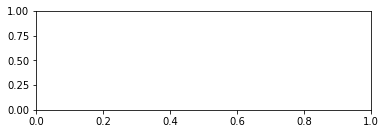

In [10]:
ax1 = plt.subplot(211)
# perf.portfolio_value.plot(ax=ax1)
perf.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('Portfolio Value')
ax2 = plt.subplot(212,sharex=ax1)
perd.AAPL.plot(ax=ax2)
ax2.set_ylabel('AAPL stock price')
plt.show()